# Reading in the NOAA GOES-16 image data

The data is available in an s3 bucket at: s3://noaa-goes18/ (GOES-18 is GOES-WEST)

Information about the s3 structure can be found here: https://github.com/awslabs/open-data-docs/tree/main/docs/noaa/noaa-goes16

To Do:
* Find the exact file path needed for the fog images
* Optimize reading process to minimize datasize needed to be saved on disk

Notes:
* Currently, each "file" has all images from all wavelengths but I only need one image related to fog
    * Potential solution: Loop through each file, download it, strip out the image we need and delete the rest of the file
* There exists a "Clear Sky Mask" binary variable that could be used if the fog data is not clean enough for predictions.

In [60]:
### USE THIS CELL TO DOWNLOAD FROM S3
!aws s3 cp --recursive --no-sign-request s3://noaa-goes18/ABI-L2-MCMIPC/2023/295/21 ./fog_data/ABI-L2-MCMIPC/2023/295/21

Completed 256.0 KiB/327.4 MiB (268.3 KiB/s) with 6 file(s) remaining
Completed 512.0 KiB/327.4 MiB (529.8 KiB/s) with 6 file(s) remaining
Completed 768.0 KiB/327.4 MiB (779.2 KiB/s) with 6 file(s) remaining
Completed 1.0 MiB/327.4 MiB (1022.0 KiB/s) with 6 file(s) remaining 
Completed 1.2 MiB/327.4 MiB (1.2 MiB/s) with 6 file(s) remaining    
Completed 1.5 MiB/327.4 MiB (1.5 MiB/s) with 6 file(s) remaining    
Completed 1.8 MiB/327.4 MiB (1.6 MiB/s) with 6 file(s) remaining    
Completed 2.0 MiB/327.4 MiB (1.9 MiB/s) with 6 file(s) remaining    
Completed 2.2 MiB/327.4 MiB (2.1 MiB/s) with 6 file(s) remaining    
Completed 2.5 MiB/327.4 MiB (2.3 MiB/s) with 6 file(s) remaining    
Completed 2.8 MiB/327.4 MiB (2.5 MiB/s) with 6 file(s) remaining    
Completed 3.0 MiB/327.4 MiB (2.7 MiB/s) with 6 file(s) remaining    
Completed 3.2 MiB/327.4 MiB (2.9 MiB/s) with 6 file(s) remaining    
Completed 3.5 MiB/327.4 MiB (3.1 MiB/s) with 6 file(s) remaining    
Completed 3.8 MiB/327.4 MiB (3.3 M

In [2]:
# !conda install -c conda-forge netCDF4

In [61]:
%matplotlib inline
from netCDF4 import Dataset
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [62]:
g16nc = Dataset('./fog_data/ABI-L2-MCMIPC/2023/295/21/OR_ABI-L2-MCMIPC-M6_G18_s20232952126183_e20232952128562_c20232952129059.nc', 'r')

In [63]:
g16nc.variables

{'CMI_C01': <class 'netCDF4._netCDF4.Variable'>
 int16 CMI_C01(y, x)
     _FillValue: -1
     long_name: ABI Cloud and Moisture Imagery reflectance factor
     standard_name: toa_lambertian_equivalent_albedo_multiplied_by_cosine_solar_zenith_angle
     _Unsigned: true
     sensor_band_bit_depth: 10
     downsampling_method: average
     valid_range: [   0 4095]
     scale_factor: 0.00031746
     add_offset: 0.0
     units: 1
     resolution: y: 0.000056 rad x: 0.000056 rad
     coordinates: band_id_C01 band_wavelength_C01 t y x
     grid_mapping: goes_imager_projection
     cell_methods: t: point area: sum (interval: 0.000028 rad)
     ancillary_variables: DQF_C01
 unlimited dimensions: 
 current shape = (1500, 2500)
 filling on,
 'DQF_C01': <class 'netCDF4._netCDF4.Variable'>
 int8 DQF_C01(y, x)
     _FillValue: -1
     long_name: ABI Cloud and Moisture Imagery reflectance factor data quality flags
     standard_name: status_flag
     _Unsigned: true
     valid_range: [0 4]
     units

In [64]:
temp_data = g16nc.variables['CMI_C06'][:]
g16nc.close()

In [65]:
temp_data

masked_array(
  data=[[0.1412697 , 0.13999987, 0.13999987, ..., 0.09111103, 0.07492056,
         0.0714285 ],
        [0.1412697 , 0.13873002, 0.1412697 , ..., 0.07873008, 0.06285708,
         0.0603174 ],
        [0.13999987, 0.13873002, 0.14253955, ..., 0.0603174 , 0.0539682 ,
         0.0539682 ],
        ...,
        [0.00380952, 0.0063492 , 0.00730158, ..., 0.04063488, 0.04793646,
         0.01619046],
        [0.00380952, 0.00507936, 0.0063492 , ..., 0.01238094, 0.03936504,
         0.02476188],
        [0.00380952, 0.0063492 , 0.0063492 , ..., 0.02476188, 0.07365073,
         0.08476182]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

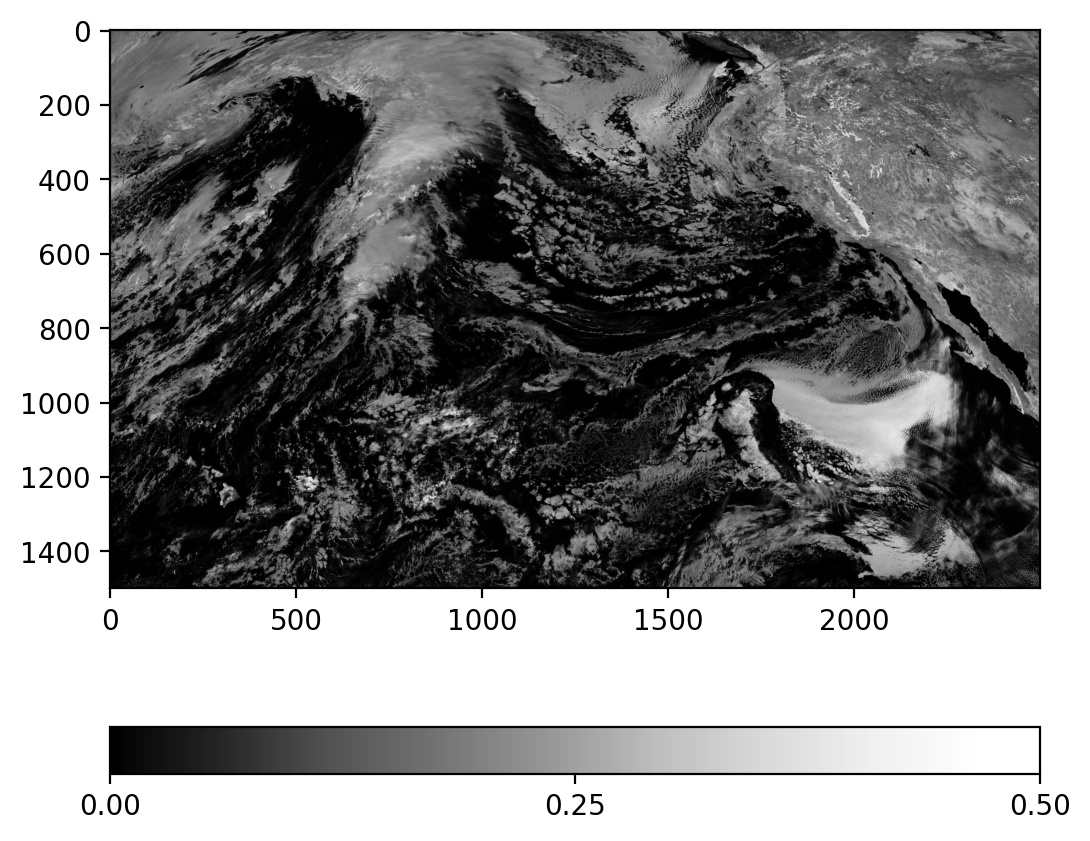

In [66]:
fig = plt.figure(figsize=(6,6),dpi=200)
im = plt.imshow(temp_data, cmap='Greys_r')
cb = fig.colorbar(im, orientation='horizontal')
cb.set_ticks([0, 0.25, 0.5])
# cb.set_label('Radiance (W m-2 sr-1 um-1)')
plt.show()


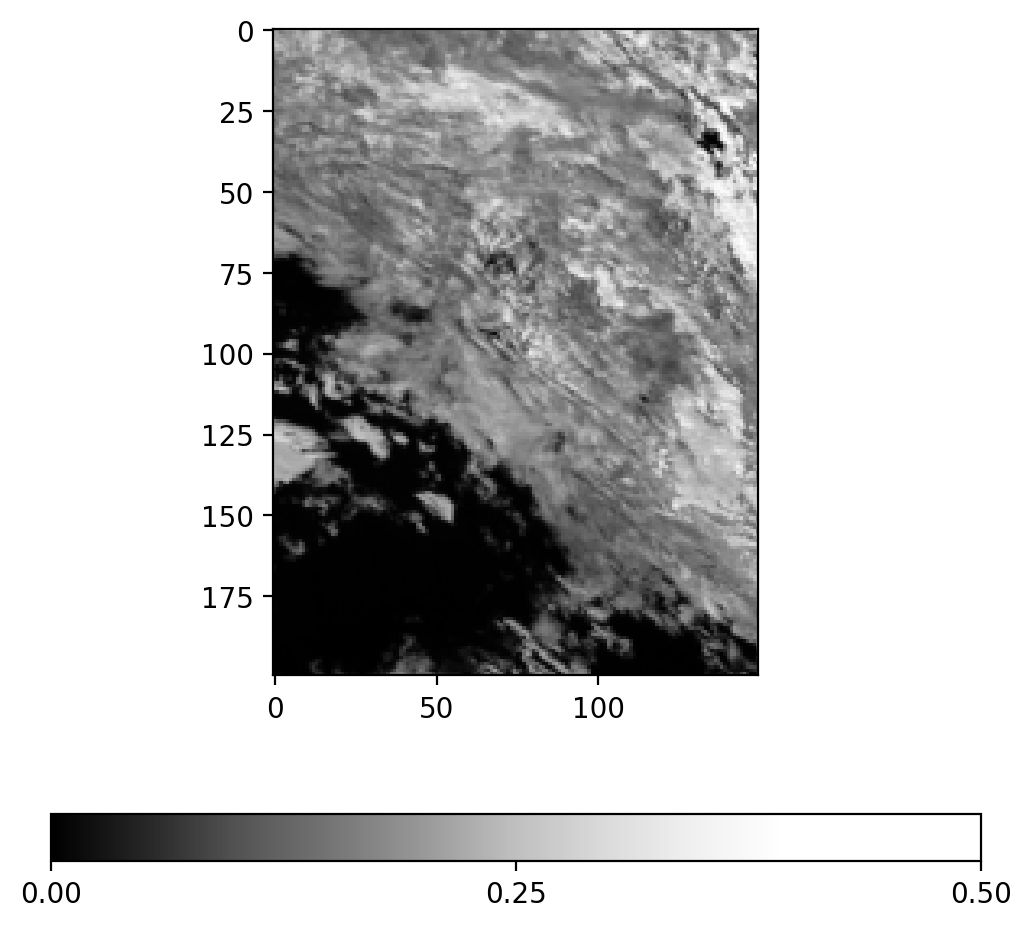

In [67]:
fig = plt.figure(figsize=(6,6),dpi=200)
im = plt.imshow(temp_data[350:550, 1800:1950], cmap='Greys_r')
cb = fig.colorbar(im, orientation='horizontal')
cb.set_ticks([0, 0.25, 0.5])
# cb.set_label('Radiance (W m-2 sr-1 um-1)')
plt.show()


In [23]:
temp_data[-10:][-10:]

masked_array(
  data=[[0.01841268, 0.02317458, 0.0111111 , ..., 0.0619047 , 0.09714276,
         0.11777767],
        [0.01333332, 0.00857142, 0.00857142, ..., 0.06920628, 0.08380944,
         0.11047608],
        [0.01333332, 0.01333332, 0.01206348, ..., 0.07523803, 0.08857135,
         0.07650787],
        ...,
        [0.02444442, 0.031746  , 0.02793648, ..., 0.00507936, 0.00984126,
         0.01333332],
        [0.015873  , 0.01714284, 0.01206348, ..., 0.00603174, 0.00603174,
         0.00857142],
        [0.02190474, 0.04507932, 0.031746  , ..., 0.00603174, 0.00603174,
         0.0111111 ]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)